In [1]:
import bt
import sys
sys.path.append('../')
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'
%matplotlib inline

<Axes: xlabel='date'>

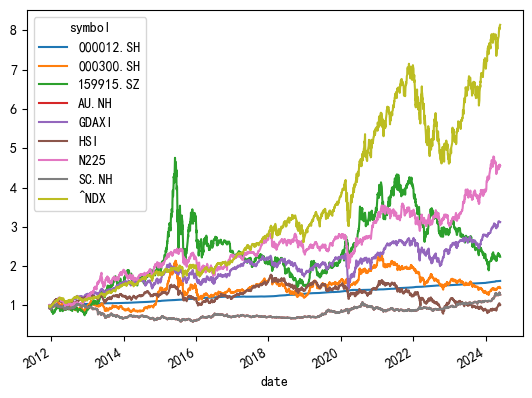

In [2]:
from datafeed.dataloader import CSVDataloader
data = CSVDataloader.get(['000300.SH', #沪深300
                          '159915.SZ', #创业板
                          'HSI', #香港恒生
                          '^NDX',# 纳指100
                          'GDAXI',#德国DAX
                          'N225',#日经225
                          'AU.NH',#南华黄金期货指数
                          'SC.NH',#南华 原油期货指数
                          '000012.SH',#国债指数
                         ])
data.dropna(inplace=True)
(data.pct_change()+1).cumprod().plot()

In [3]:
(data.pct_change()+1).corr()

symbol,000012.SH,000300.SH,159915.SZ,AU.NH,GDAXI,HSI,N225,SC.NH,^NDX
symbol,,,,,,,,,
000012.SH,1.000000,-0.027361,-0.014380,0.031956,-0.035804,-0.075497,-0.016194,0.031956,-0.022426
000300.SH,-0.027361,1.000000,0.730531,0.027087,0.184660,0.586951,0.297825,0.027087,0.164946
159915.SZ,-0.014380,0.730531,1.000000,0.017543,0.140171,0.391999,0.201467,0.017543,0.134804
AU.NH,0.031956,0.027087,0.017543,1.000000,-0.005151,0.013568,-0.100593,1.000000,0.014933
GDAXI,-0.035804,0.184660,0.140171,-0.005151,1.000000,0.376850,0.345328,-0.005151,0.507081
HSI,-0.075497,0.586951,0.391999,0.013568,0.376850,1.000000,0.483490,0.013568,0.233240
N225,-0.016194,0.297825,0.201467,-0.100593,0.345328,0.483490,1.000000,-0.100593,0.181961
SC.NH,0.031956,0.027087,0.017543,1.000000,-0.005151,0.013568,-0.100593,1.000000,0.014933
^NDX,-0.022426,0.164946,0.134804,0.014933,0.507081,0.233240,0.181961,0.014933,1.000000


In [4]:
import bt
s = bt.Strategy('全球大类资-风险平价-月度再平衡', [
                            bt.algos.RunAfterDays(
                            20*6 + 1
                        ),
                       bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighERC(),
                       bt.algos.Rebalance()])
test = bt.Backtest(s, data)
stras = [test]

In [5]:
for bench in ['000300.SH']:
    data = CSVDataloader.get([bench])
    s = bt.Strategy(bench, [bt.algos.RunOnce(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
    stra = bt.Backtest(s, data)
    stras.append(stra)
    
res = bt.run(*stras)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.25it/s]


<Axes: title={'center': 'Equity Progression'}>

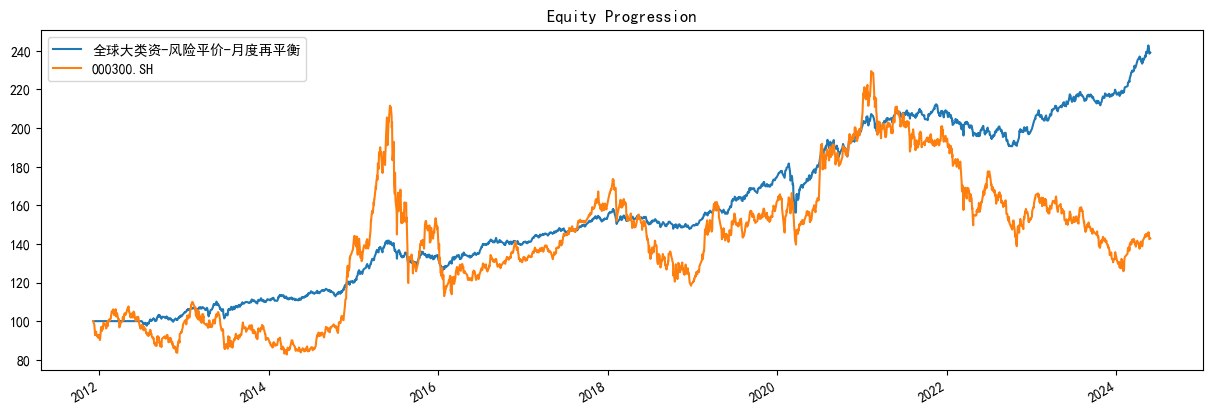

In [6]:
res.plot()

In [7]:
res.stats

,全球大类资-风险平价-月度再平衡,000300.SH
start,2011-12-08 00:00:00,2011-12-08 00:00:00
end,2024-05-28 00:00:00,2024-05-28 00:00:00
rf,0.0,0.0
total_return,1.390305,0.427534
cagr,0.072376,0.028954
max_drawdown,-0.13985,-0.466015
calmar,0.517523,0.06213
mtd,0.016252,0.001322
three_month,0.06783,0.045914
six_month,0.101536,0.025684
